In [5]:
import numpy as np
import matplotlib.pyplot as plt

import json
from scipy.integrate import simps
import os
from glob  import glob

In [6]:
def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

In [7]:

def AUCError(errors, failureThreshold=0.08, step=0.0001, showCurve=False):
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    if showCurve:
        fig, ax = plt.subplots(figsize=(10,8))
        plt.title('Area Under Curve')
        plt.xlabel('Normalized Localization Error(%)',  fontsize=12)
        plt.ylabel('Cumulative Error Distribution',  fontsize=12)
        plt.ylim([0, 1])
        plt.plot(np.asarray(xAxis) * 100, ced, color='red')
        plt.grid()
        plt.show()

0.01288278775079199
----------------------------------------------------------------------------------------------------
nle_add_dataset.json
AUC @ 0.08: 0.745
Failure rate: 0.013
0.14361140443505804
----------------------------------------------------------------------------------------------------
nle_base.json
AUC @ 0.08: 0.717
Failure rate: 0.144
0.0
----------------------------------------------------------------------------------------------------
nle_FFHQ_LS3D_W.json
AUC @ 0.08: 0.877
Failure rate: 0.0


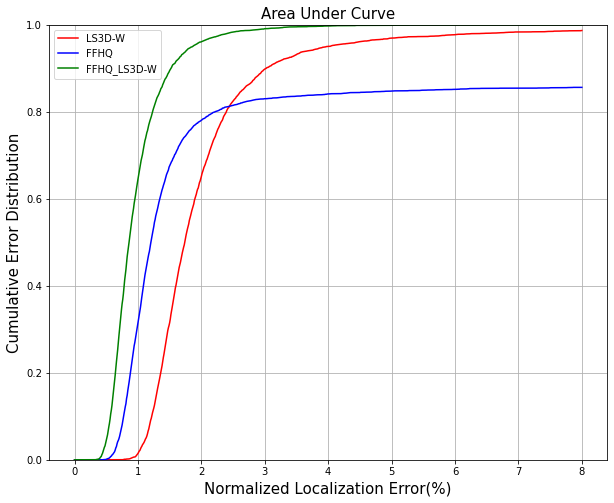

In [10]:

"""
# laod metrics
path = '/aidata/anders/objects/landmarks/metrics/nle_base.json'
annos = load_json(path)
ffhq_base = np.asarray(annos['nle'])
num_samples = annos['num_samples']
interocular = annos['interocular']
mean_interocular = np.mean(interocular).astype(np.float16)
AUCError(ffhq_base, showCurve = True)
# Eval_type  countour  left_eye  right_eye    nose       lip
# accuracy     0.577  0.794500   0.717000  0.7665  0.685625
#----------------------------------------------------------------

path = '/aidata/anders/objects/landmarks/metrics/nle_add_dataset.json'
annos = load_json(path)
LS3D_W_base = np.asarray(annos['nle'])
num_samples = annos['num_samples']
interocular = annos['interocular']
mean_interocular = np.mean(interocular).astype(np.float16)
AUCError(LS3D_W_base, showCurve = True)
# Eval_type  countour  left_eye  right_eye    nose       lip
# 0   accuracy  0.387333  0.571833   0.448667  0.4515  0.4530
errors = []
"""
colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(figsize=(10,8))
failureThreshold=0.08
step=0.0001
lb_names = ['LS3D-W', 'FFHQ', 'FFHQ_LS3D-W']
anno_root = '/aidata/anders/objects/landmarks/metrics'
anno_paths = glob((os.path.join(anno_root, '*.json')))
for i, path in enumerate(anno_paths):              
    annos = load_json(path)
    errors = np.asarray(annos['nle'])
    num_samples = annos['num_samples']
    interocular = annos['interocular']
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
   
    failureRate = 1. - ced[-1]
    
    print(failureRate)

    print('-' * 100)
    print(path.split('/')[-1])
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))

    plt.plot(np.asarray(xAxis) * 100, ced, color=colors[i], label=lb_names[i])
plt.ylim([0, 1])
plt.title('Area Under Curve', fontsize=15)
plt.xlabel('Normalized Localization Error(%)',  fontsize=15)
plt.ylabel('Cumulative Error Distribution',  fontsize=15)
plt.grid()
plt.legend()
plt.show()
    


In [37]:

nErrors = len(errors)
xAxis = list(np.arange(0., failureThreshold + step, step))
ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
AUC = simps(ced, x=xAxis) / failureThreshold
failureRate = 1. - ced[-1]
print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
print("Failure rate: {0}".format(np.round(failureRate, 3)))
if showCurve:
    fig, ax = plt.subplots(figsize=(10,8))
    plt.title('Area Under Curve')
    plt.xlabel('Normalized Localization Error(%)',  fontsize=12)
    plt.ylabel('Cumulative Error Distribution',  fontsize=12)
    plt.ylim([0, 1])
    plt.plot(np.asarray(xAxis) * 100, ced, color='red')
    plt.grid()
    plt.show()

AUC @ 0.08: 0.717
Failure rate: 0.144


NameError: name 'showCurve' is not defined